<a href="https://colab.research.google.com/github/Guru-180188/Projects/blob/main/Speech_Emotion_Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
!mkdir -p ~/ .kaggle

In [7]:
!cp kaggle.json ~/.kaggle/

In [8]:
!chmod 600 /root/.kaggle/kaggle.json

In [9]:
!kaggle datasets download -d ejlok1/toronto-emotional-speech-set-tess

 99% 422M/428M [00:04<00:00, 106MB/s] 
100% 428M/428M [00:04<00:00, 90.4MB/s]


In [11]:
import zipfile
zip_ref = zipfile.ZipFile('/content/toronto-emotional-speech-set-tess.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [18]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
import librosa
import librosa.display
from IPython.display import Audio
import warnings
warnings.filterwarnings('ignore')

In [34]:
paths = []
labels = []
for dirname, _, filenames in os.walk('/content/TESS Toronto emotional speech set data'):
    for filename in filenames:
        paths.append(os.path.join(dirname, filename))
        label = filename.split('_')[-1]
        label = label.split('.')[0]
        labels.append(label.lower())
    if len(paths) == 2800:
        break
print('Dataset is Loaded')

Dataset is Loaded


In [35]:
len(paths)

2800

In [36]:
paths[:5]

['/content/TESS Toronto emotional speech set data/YAF_pleasant_surprised/YAF_team_ps.wav',
 '/content/TESS Toronto emotional speech set data/YAF_pleasant_surprised/YAF_lose_ps.wav',
 '/content/TESS Toronto emotional speech set data/YAF_pleasant_surprised/YAF_cheek_ps.wav',
 '/content/TESS Toronto emotional speech set data/YAF_pleasant_surprised/YAF_sheep_ps.wav',
 '/content/TESS Toronto emotional speech set data/YAF_pleasant_surprised/YAF_tip_ps.wav']

In [37]:
labels[:5]

['ps', 'ps', 'ps', 'ps', 'ps']

In [38]:
## Create a dataframe
df = pd.DataFrame()
df['speech'] = paths
df['label'] = labels
df.head()

,speech,label
0,/content/TESS Toronto emotional speech set dat...,ps
1,/content/TESS Toronto emotional speech set dat...,ps
2,/content/TESS Toronto emotional speech set dat...,ps
3,/content/TESS Toronto emotional speech set dat...,ps
4,/content/TESS Toronto emotional speech set dat...,ps


In [39]:
df['label'].value_counts()

ps         400
happy      400
angry      400
sad        400
disgust    400
neutral    400
fear       400
Name: label, dtype: int64

<Axes: xlabel='label', ylabel='count'>

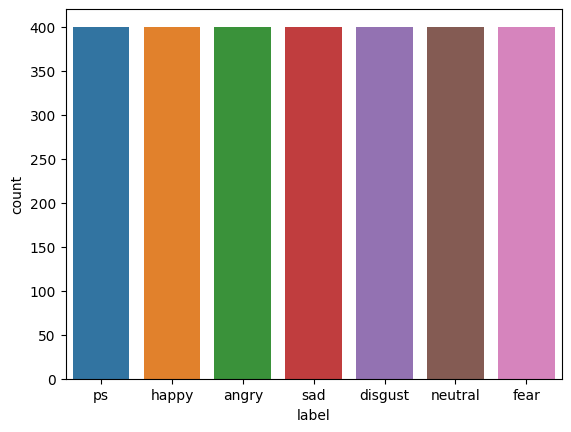

In [40]:
sns.countplot(data=df, x='label')

In [41]:
def waveplot(data, sr, emotion):
    plt.figure(figsize=(10,4))
    plt.title(emotion, size=20)
    librosa.display.waveshow(data, sr=sr)
    plt.show()

def spectogram(data, sr, emotion):
    x = librosa.stft(data)
    xdb = librosa.amplitude_to_db(abs(x))
    plt.figure(figsize=(11,4))
    plt.title(emotion, size=20)
    librosa.display.specshow(xdb, sr=sr, x_axis='time', y_axis='hz')
    plt.colorbar()

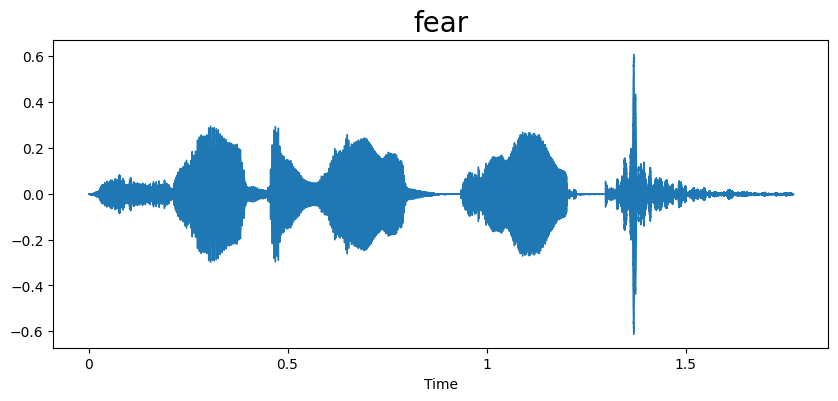

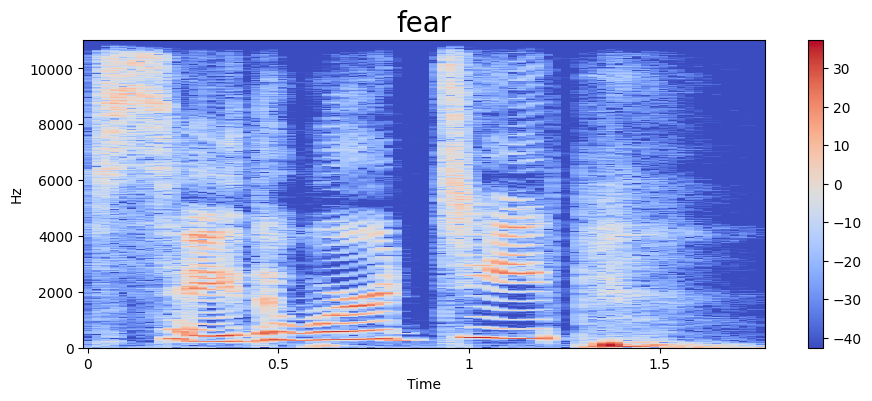

In [42]:
emotion = 'fear'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

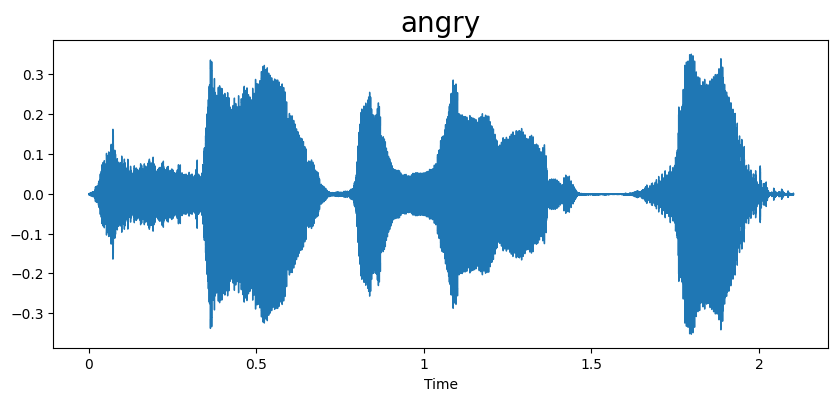

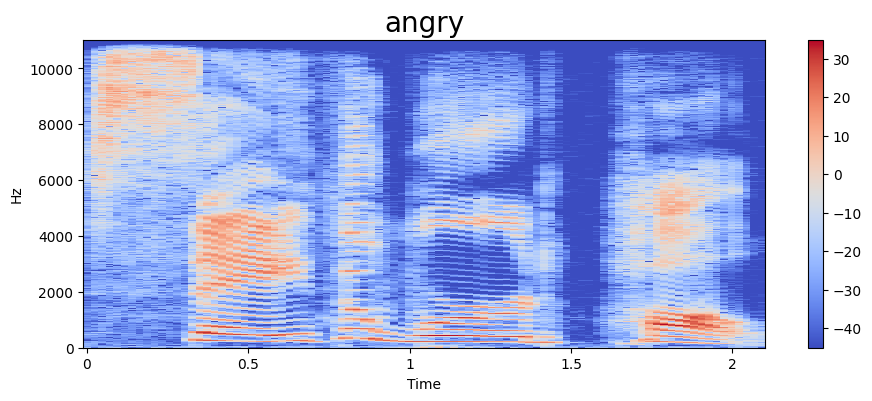

In [43]:
emotion = 'angry'
path = np.array(df['speech'][df['label']==emotion])[1]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

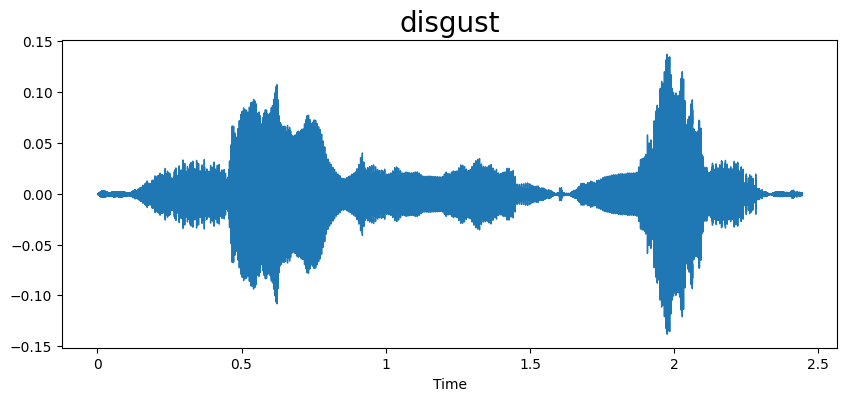

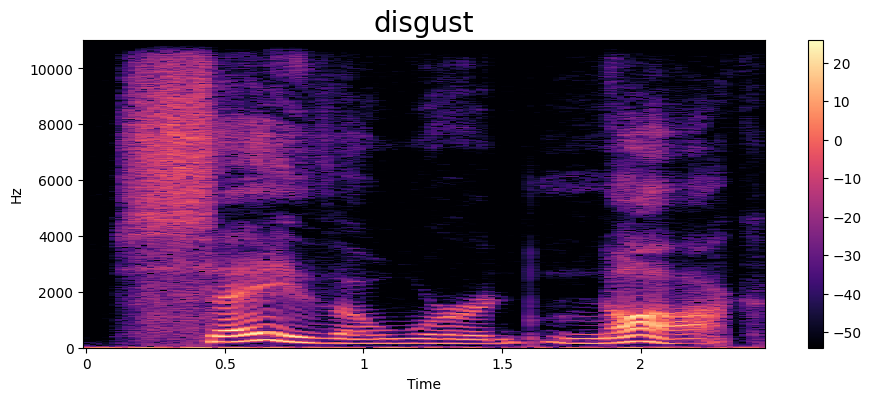

In [44]:
emotion = 'disgust'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

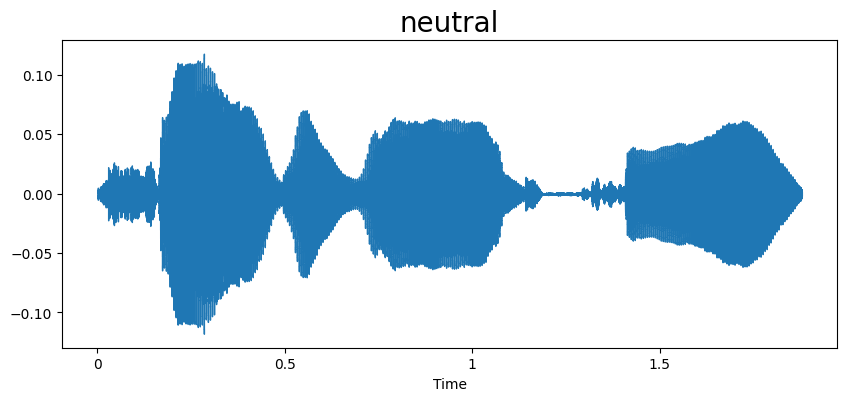

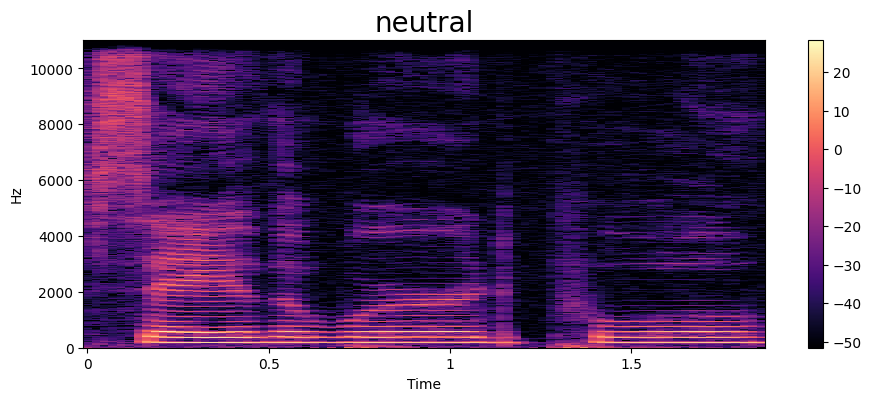

In [45]:
emotion = 'neutral'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

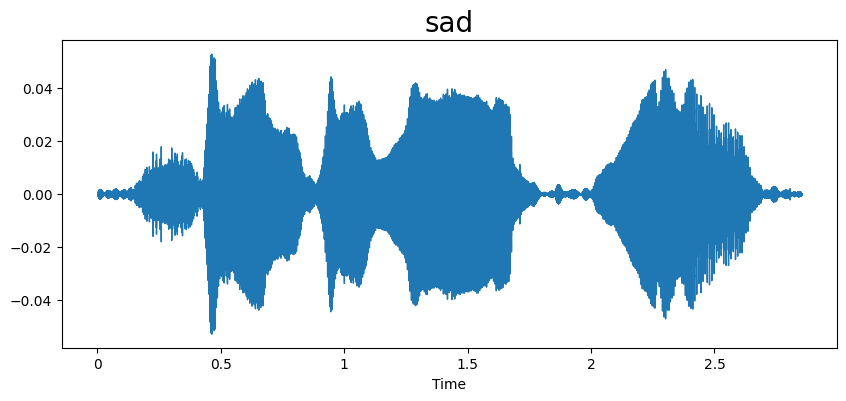

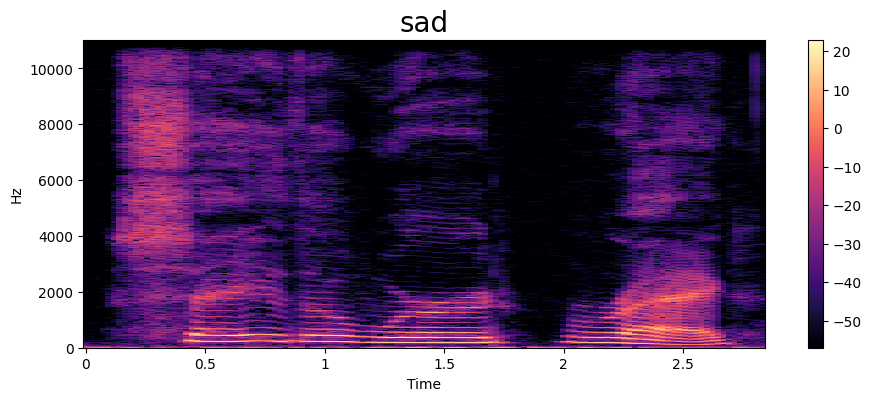

In [46]:
emotion = 'sad'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

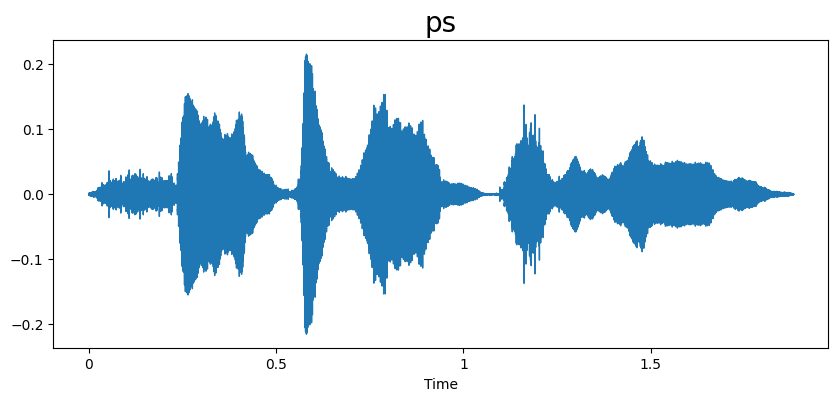

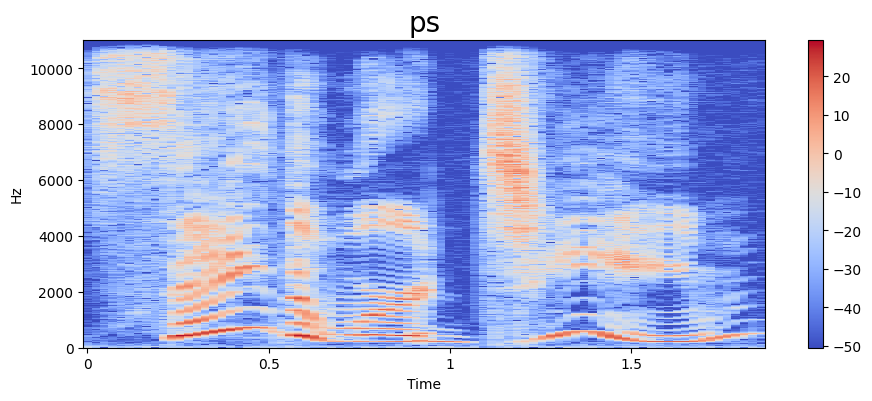

In [47]:
emotion = 'ps'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

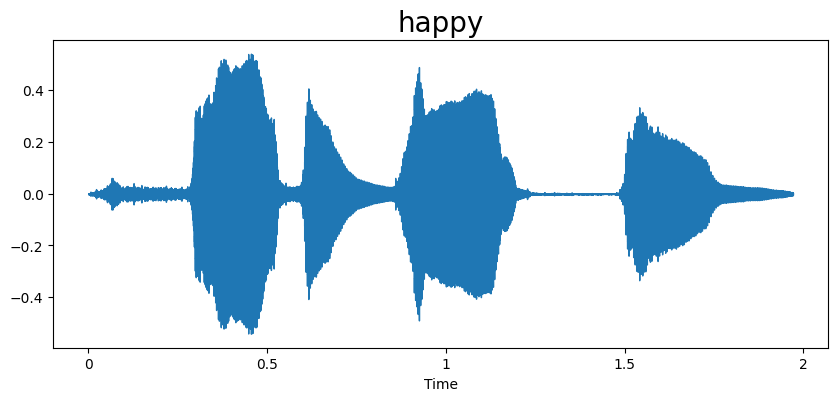

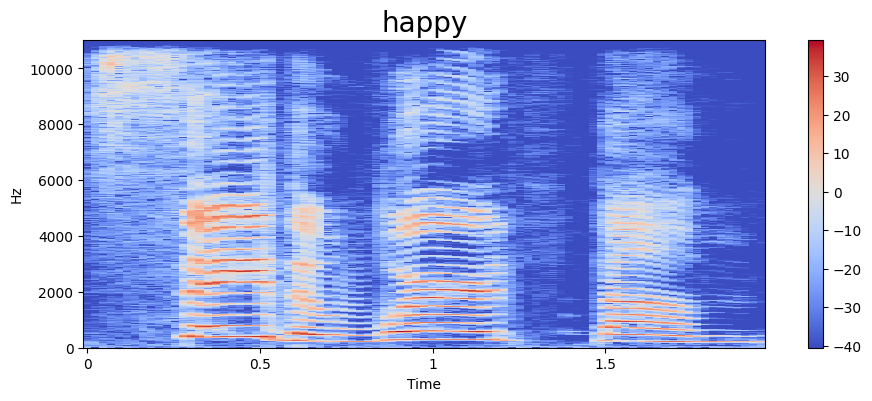

In [48]:
emotion = 'happy'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

In [49]:
def extract_mfcc(filename):
    y, sr = librosa.load(filename, duration=3, offset=0.5)
    mfcc = np.mean(librosa.feature.mfcc(y=y, sr=sr, n_mfcc=40).T, axis=0)
    return mfcc

In [50]:
extract_mfcc(df['speech'][0])

array([-3.9198987e+02,  5.0176720e+01, -5.2754562e-02,  3.2284187e+01,
       -1.6830717e+01, -5.4233789e+00, -2.5709405e+00, -2.0580051e+01,
       -1.6808069e+01, -1.3713047e+01, -1.8829792e+01,  5.3353109e+00,
       -1.0301312e+01,  1.1597292e+01,  4.2198610e+00,  1.0018078e+00,
        1.0407538e+01,  9.0366383e+00, -3.8273661e+00,  1.1895660e+00,
       -7.8112879e+00,  4.2049093e+00, -3.3577628e+00,  2.7132468e+00,
       -4.6984439e+00, -1.4269178e+00,  3.2972975e+00,  6.8146186e+00,
        6.2002096e+00,  1.2704482e+01,  1.2800579e+01,  1.3941733e+01,
        6.1982827e+00,  7.5265098e+00,  2.0289390e+00,  4.7054539e+00,
        2.5998206e+00,  3.1301503e+00,  1.7100050e+00,  3.0458379e+00],
      dtype=float32)

In [51]:
X_mfcc = df['speech'].apply(lambda x: extract_mfcc(x))

In [52]:
X_mfcc

0       [-391.98987, 50.17672, -0.052754562, 32.284187...
1       [-374.9586, 60.929073, -1.760022, 1.7506487, -...
2       [-376.4632, 37.22672, -2.8168387, 32.950535, -...
3       [-389.91425, 44.45622, 5.673066, 42.423985, -1...
4       [-329.71783, 69.18971, -4.5447865, 9.920192, -...
                              ...                        
2795    [-412.95264, 65.68578, -23.787447, -14.069271,...
2796    [-418.01657, 68.69425, -5.312054, 2.1744857, -...
2797    [-404.03497, 47.880775, -6.186285, -4.488095, ...
2798    [-430.04578, 82.14932, -5.9149575, -24.96652, ...
2799    [-403.62918, 34.433327, -7.452714, 13.0641, 0....
Name: speech, Length: 2800, dtype: object

In [53]:
X = [x for x in X_mfcc]
X = np.array(X)
X.shape

(2800, 40)

In [54]:
## input split
X = np.expand_dims(X, -1)
X.shape

(2800, 40, 1)

In [55]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder()
y = enc.fit_transform(df[['label']])

In [56]:
y = y.toarray()

In [57]:
y.shape

(2800, 7)

In [58]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout

model = Sequential([
    LSTM(256, return_sequences=False, input_shape=(40,1)),
    Dropout(0.2),
    Dense(128, activation='relu'),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(7, activation='softmax')
])

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 256)               264192    
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense (Dense)               (None, 128)               32896     
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dropout_2 (Dropout)         (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 7)                 4

In [59]:
# Train the model
history = model.fit(X, y, validation_split=0.2, epochs=50, batch_size=64)

Epoch 1/50
35/35 [==============================] - 6s 28ms/step - loss: 1.3921 - accuracy: 0.4420 - val_loss: 1.5664 - val_accuracy: 0.5071
Epoch 2/50
35/35 [==============================] - 0s 10ms/step - loss: 0.5518 - accuracy: 0.7987 - val_loss: 3.0167 - val_accuracy: 0.2982
Epoch 3/50
35/35 [==============================] - 0s 9ms/step - loss: 0.3196 - accuracy: 0.8929 - val_loss: 2.5928 - val_accuracy: 0.5089
Epoch 4/50
35/35 [==============================] - 0s 8ms/step - loss: 0.2053 - accuracy: 0.9330 - val_loss: 2.6581 - val_accuracy: 0.6179
Epoch 5/50
35/35 [==============================] - 0s 8ms/step - loss: 0.1359 - accuracy: 0.9558 - val_loss: 2.6574 - val_accuracy: 0.5679
Epoch 6/50
35/35 [==============================] - 0s 8ms/step - loss: 0.1393 - accuracy: 0.9571 - val_loss: 2.5181 - val_accuracy: 0.6071
Epoch 7/50
35/35 [==============================] - 0s 8ms/step - loss: 0.1106 - accuracy: 0.9701 - val_loss: 2.6160 - val_accuracy: 0.5054
Epoch 8/50
35/35 [

In [60]:
# best val accuracy: 72.32
# use checkpoint to save the best val accuracy model
# adjust learning rate for slow convergence

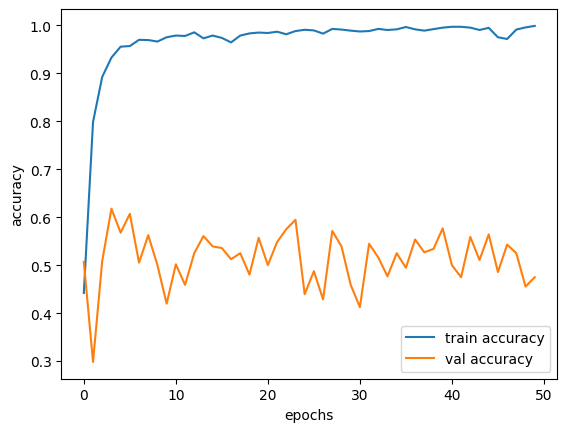

In [61]:
epochs = list(range(50))
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(epochs, acc, label='train accuracy')
plt.plot(epochs, val_acc, label='val accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

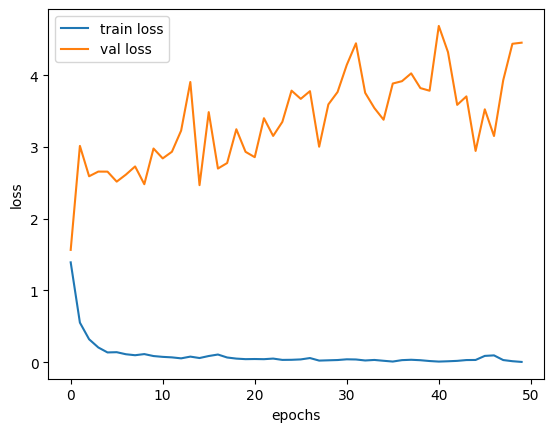

In [62]:
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.plot(epochs, loss, label='train loss')
plt.plot(epochs, val_loss, label='val loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()